In [ ]:
import pandas as pd

# Load the dataset
file_path = "/mnt/data/mental_health_seasonal_sentiment_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


# Task
Tell me about this dataset.

Here is all the data you need:
"mental_health_seasonal_sentiment_dataset.csv"

## Data loading

### Subtask:
Load the dataset "mental_health_seasonal_sentiment_dataset.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('mental_health_seasonal_sentiment_dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'mental_health_seasonal_sentiment_dataset.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,post_id,subreddit,title,body,created_utc,season,sentiment_score,label
0,t3_613988,r/BipolarReddit,Therapy helped me today,The cold weather always brings me down.,2023-05-01 22:25:36,Spring,0.63,positive
1,t3_520818,r/BipolarReddit,Struggling with motivation,Maybe things will turn out okay.,2023-08-10 18:40:53,Summer,-0.14,negative
2,t3_588603,r/depression,Coping mechanisms that work,No emotions left. Just blank.,2023-09-06 01:16:53,Fall,0.27,positive
3,t3_719275,r/depression,Struggling with motivation,Deep breaths and journaling are helping.,2023-10-29 11:59:27,Fall,0.73,positive
4,t3_976717,r/depression,I feel overwhelmed today,Maybe things will turn out okay.,2023-03-18 20:48:37,Spring,-0.65,negative


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including the number of rows and columns, data types of each column, and summary statistics for numerical columns. Identify potential missing values and unique values in categorical columns.


**Reasoning**:
Explore the dataset's structure, data types, summary statistics, missing values, and unique values in categorical columns.



In [2]:
# Examine the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame.
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns.
print("\nDescriptive Statistics:")
print(df.describe())

# Identify unique values in categorical columns and their distribution.
categorical_cols = ['season', 'subreddit', 'label']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

# Check for missing values.
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the DataFrame: (200, 8)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          200 non-null    object 
 1   subreddit        200 non-null    object 
 2   title            200 non-null    object 
 3   body             200 non-null    object 
 4   created_utc      200 non-null    object 
 5   season           200 non-null    object 
 6   sentiment_score  200 non-null    float64
 7   label            200 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.6+ KB

Descriptive Statistics:
       sentiment_score
count       200.000000
mean          0.075950
std           0.555291
min          -0.990000
25%          -0.310000
50%           0.120000
75%           0.525000
max           1.000000

Unique values in 'season':
['Spring' 'Summer' 'Fall' 'Winter']

Value counts for 'season':
season
Sp

## Data analysis

### Subtask:
Analyze the distribution of sentiment scores across different seasons and other relevant columns.  Calculate descriptive statistics for the sentiment scores grouped by season.


**Reasoning**:
Group data by 'season' and calculate descriptive statistics for 'sentiment_score'. Then, extend this analysis to include other categorical columns like 'subreddit' and 'label', calculating the same descriptive statistics for each group.



In [3]:
# Group data by season and calculate descriptive statistics for sentiment_score.
season_stats = df.groupby('season')['sentiment_score'].agg(['mean', 'median', 'std', 'quantile'])
display(season_stats)

# Group data by subreddit and season, then calculate descriptive statistics.
subreddit_season_stats = df.groupby(['subreddit', 'season'])['sentiment_score'].agg(['mean', 'median', 'std', 'quantile'])
display(subreddit_season_stats)

# Group data by label and season, then calculate descriptive statistics.
label_season_stats = df.groupby(['label', 'season'])['sentiment_score'].agg(['mean', 'median', 'std', 'quantile'])
display(label_season_stats)

# Create a pivot table to summarize sentiment scores across multiple categorical variables.
pivot_table = pd.pivot_table(df, values='sentiment_score', index='season', columns=['subreddit', 'label'], aggfunc=['mean', 'median'])
display(pivot_table)

,mean,median,std,quantile
season,,,,
Fall,0.121277,0.270,0.633769,0.270
Spring,0.050172,0.085,0.523723,0.085
Summer,0.044182,0.030,0.518126,0.030
Winter,0.103750,0.200,0.566870,0.200


mean  median       std  quantile
subreddit       season                                      
r/Anxiety       Fall    0.197500   0.545  0.682867     0.545
                Spring -0.107500  -0.105  0.303492    -0.105
                Summer  0.251818   0.420  0.373519     0.420
                Winter  0.090000  -0.030  0.695701    -0.030
r/BipolarReddit Fall    0.070000  -0.040  0.700635    -0.040
                Spring  0.156471   0.270  0.587643     0.270
                Summer -0.170833  -0.145  0.491370    -0.145
                Winter  0.500000   0.790  0.501348     0.790
r/SuicideWatch  Fall   -0.107500  -0.215  0.737675    -0.215
                Spring -0.058462  -0.190  0.562507    -0.190
                Summer  0.010000  -0.030  0.458355    -0.030
                Winter -0.222500  -0.375  0.557027    -0.375
r/depression    Fall    0.232727   0.460  0.550347     0.460
                Spring  0.050000  -0.025  0.561427    -0.025
                Summer  0.174286   0.030  0.660829     0.030
                Winter  0.121818   0.310  0.532838     0.310
r/mentalhealth  Fall    0.172000   0.300  0.605765     0.300
                Spring  0.137000   0.135  0.495626     0.135
                Summer  0.026000   0.130  0.583729     0.130
                Winter  0.162222   0.230  0.492386     0.230

mean  median       std  quantile
label    season                                      
negative Fall   -0.576111  -0.595  0.297897    -0.595
         Spring -0.457500  -0.340  0.268899    -0.340
         Summer -0.465217  -0.410  0.283675    -0.410
         Winter -0.508667  -0.450  0.240591    -0.450
neutral  Fall   -0.032500  -0.030  0.051235    -0.030
         Spring -0.036000  -0.070  0.071624    -0.070
         Summer  0.006667  -0.005  0.055377    -0.005
         Winter -0.040000  -0.045  0.046904    -0.045
positive Fall    0.648000   0.650  0.221284     0.650
         Spring  0.485172   0.450  0.282876     0.450
         Summer  0.503462   0.435  0.223588     0.435
         Winter  0.568571   0.480  0.271077     0.480

mean                                                      \
subreddit r/Anxiety                   r/BipolarReddit                     
label      negative neutral  positive        negative neutral  positive   
season                                                                    
Fall      -0.576667     NaN  0.662000       -0.508000     NaN  0.648000   
Spring    -0.330000  -0.100  0.186667       -0.501667  -0.015  0.633333   
Summer    -0.203333  -0.050  0.490000       -0.505714   0.020  0.367500   
Winter    -0.745000  -0.045  0.736667       -0.240000     NaN  0.685000   

                                                         ...          median  \
subreddit r/SuicideWatch                   r/depression  ... r/BipolarReddit   
label           negative neutral  positive     negative  ...        positive   
season                                                   ...                   
Fall           -0.596000     NaN  0.706667    -0.690000  ...           0.800   
Spring         -0.504286     NaN  0.461667    -0.455000  ...           0.630   
Summer         -0.400000   -0.03  0.440000    -0.453333  ...           0.425   
Winter         -0.498333     NaN  0.605000    -0.390000  ...           0.815   

                                                                         \
subreddit r/SuicideWatch                  r/depression                    
label           negative neutral positive     negative neutral positive   
season                                                                    
Fall               -0.76     NaN    0.690        -0.69  -0.045     0.54   
Spring             -0.55     NaN    0.330        -0.48  -0.025     0.56   
Summer             -0.26   -0.03    0.405        -0.46   0.030     0.91   
Winter             -0.51     NaN    0.605        -0.35     NaN     0.48   

                                           
subreddit r/mentalhealth                   
label           negative neutral positive  
season                                     
Fall              -0.700  -0.020    0.700  
Spring            -0.240     NaN    0.260  
Summer            -0.605   0.100    0.505  
Winter            -0.960  -0.035    0.395  

[4 rows x 30 columns]

## Data visualization

### Subtask:
Visualize the distribution of sentiment scores and their relationships with season, subreddit, and sentiment label.


**Reasoning**:
Create the visualizations as requested in the subtask instructions.  This includes box plots, violin plots, bar plots, heatmaps, and an interactive scatter plot.  Import necessary libraries within the code block.



<ipython-input-4-34f8964ec3a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='sentiment_score', data=df, palette="Set3")


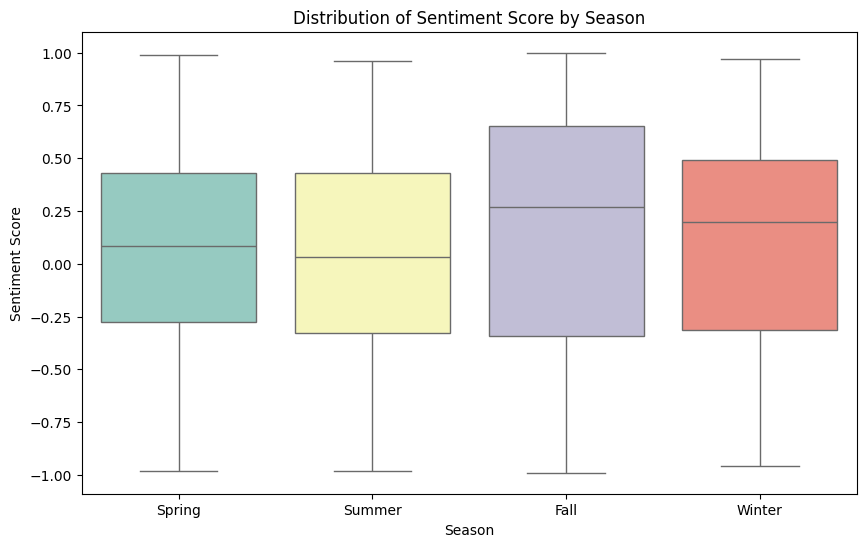

<ipython-input-4-34f8964ec3a9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='subreddit', y='sentiment_score', data=df, palette="husl")


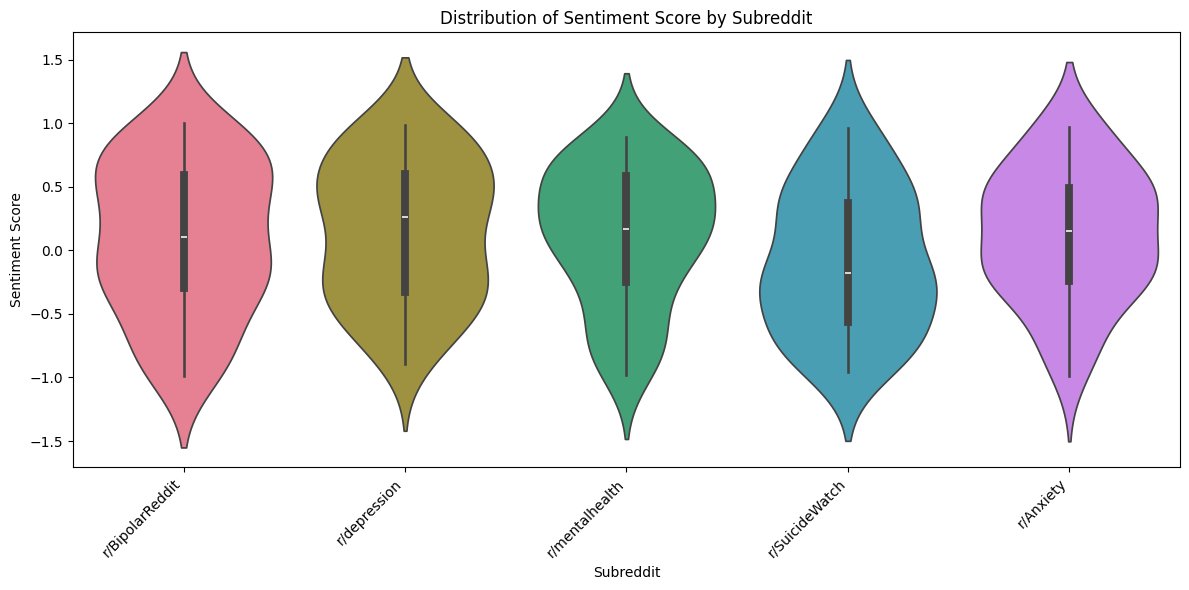

<ipython-input-4-34f8964ec3a9>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='season', y='mean', hue='label', data=season_label_stats, palette="Paired", ci='sd')


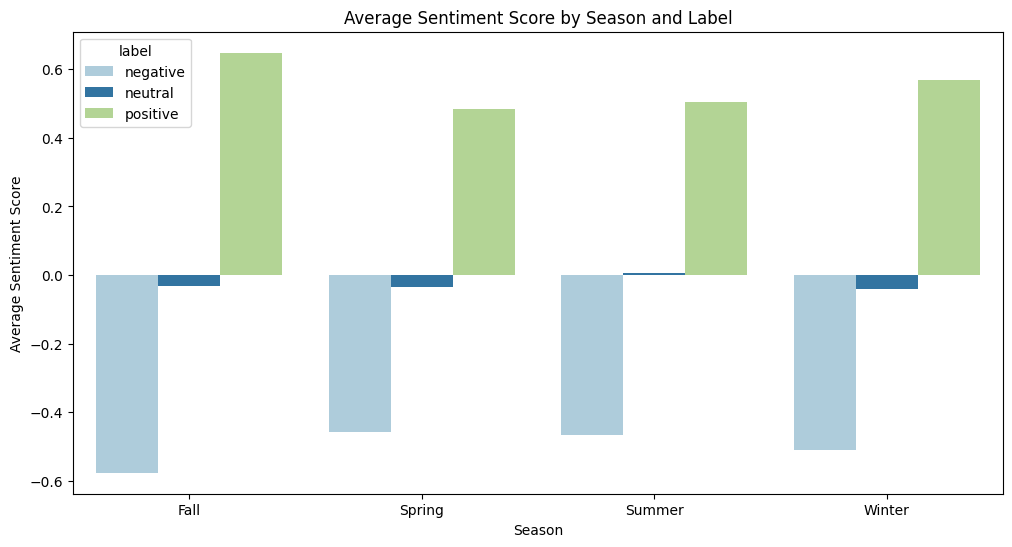

ValueError: could not convert string to float: '2023-05-01 22:25:36'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Box plot of sentiment_score by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='sentiment_score', data=df, palette="Set3")
plt.title('Distribution of Sentiment Score by Season')
plt.xlabel('Season')
plt.ylabel('Sentiment Score')
plt.show()

# 2. Violin plot of sentiment_score by subreddit
plt.figure(figsize=(12, 6))
sns.violinplot(x='subreddit', y='sentiment_score', data=df, palette="husl")
plt.title('Distribution of Sentiment Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 3. Bar plot of average sentiment_score by season and label
season_label_stats = df.groupby(['season', 'label'])['sentiment_score'].agg(['mean', 'std'])
season_label_stats = season_label_stats.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='mean', hue='label', data=season_label_stats, palette="Paired", ci='sd')
plt.title('Average Sentiment Score by Season and Label')
plt.xlabel('Season')
plt.ylabel('Average Sentiment Score')
plt.show()


# 4. Heatmap of correlations
numerical_cols = ['sentiment_score', 'created_utc']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Interactive scatter plot
df['created_utc'] = pd.to_datetime(df['created_utc'])

fig = px.scatter(df, x='sentiment_score', y='created_utc', color='season', size=abs(df['sentiment_score']),
                 hover_data=['subreddit', 'label'],
                 title='Sentiment Score over Time',
                 labels={'sentiment_score': 'Sentiment Score', 'created_utc': 'Created UTC'})
fig.show()

**Reasoning**:
The previous code block failed due to a type error in the correlation calculation and the interactive plot. Correct the data type of the 'created_utc' column to datetime and handle the 'created_utc' column separately in the correlation calculation.  Also, address the warnings about the palette argument in seaborn plots.



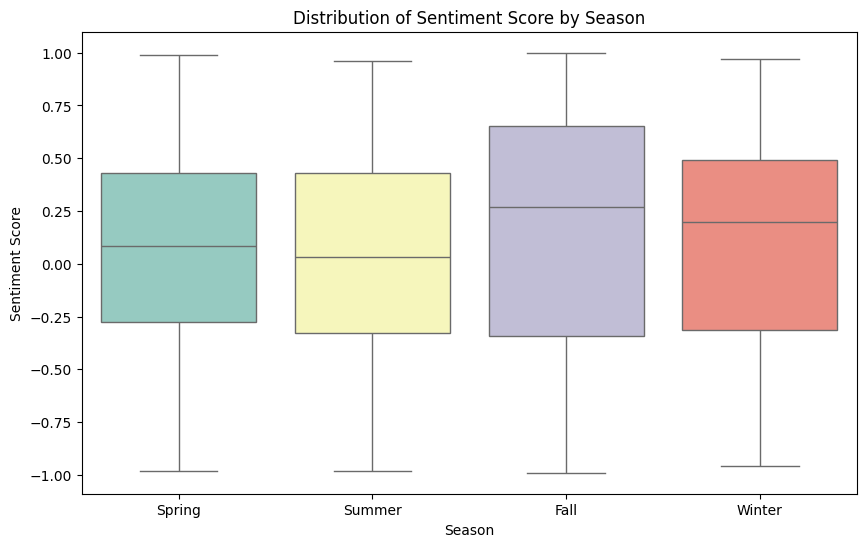

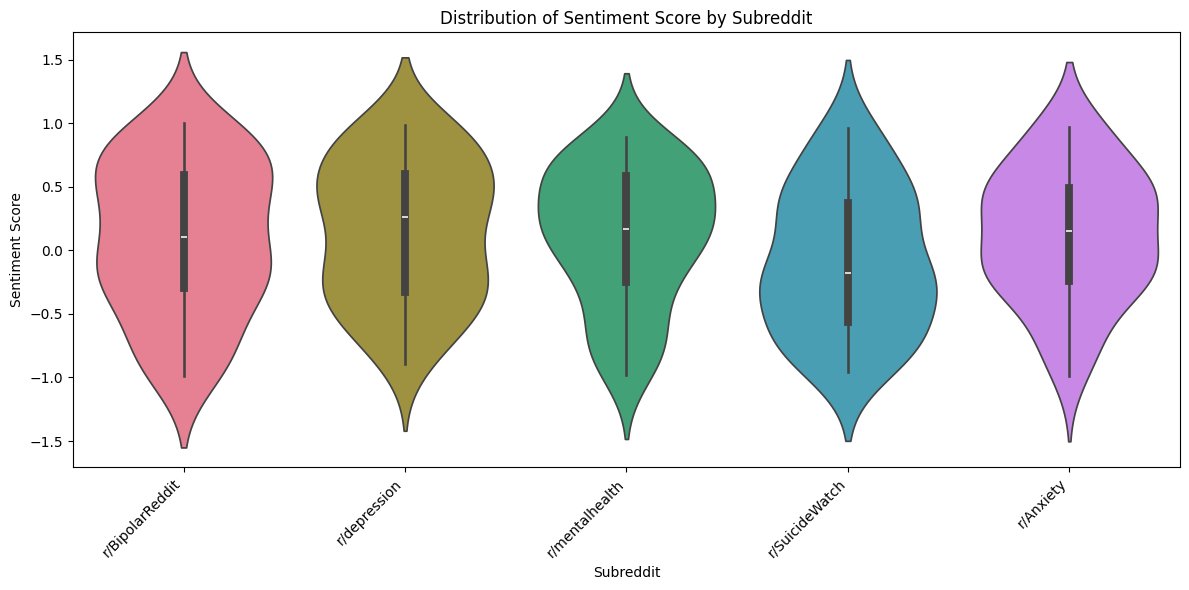

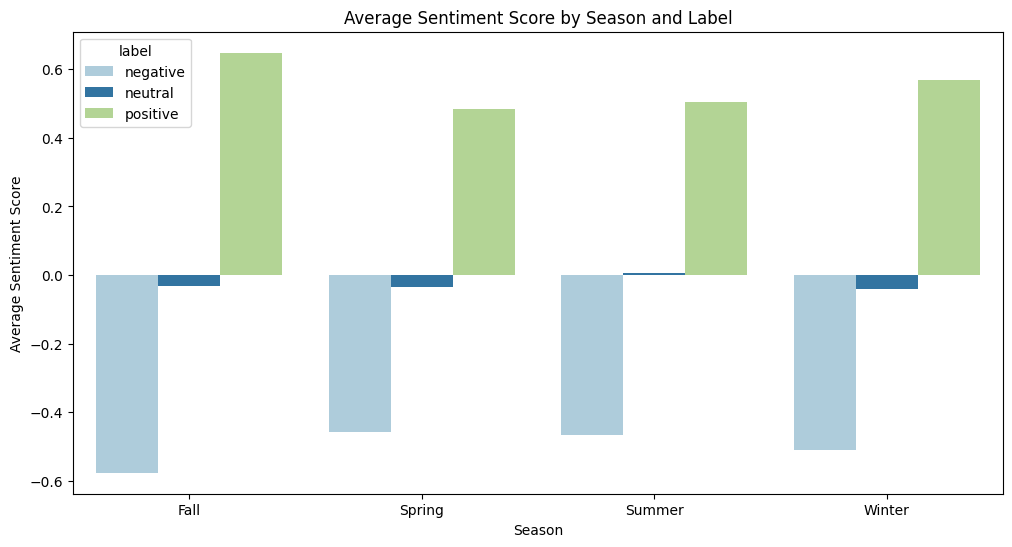

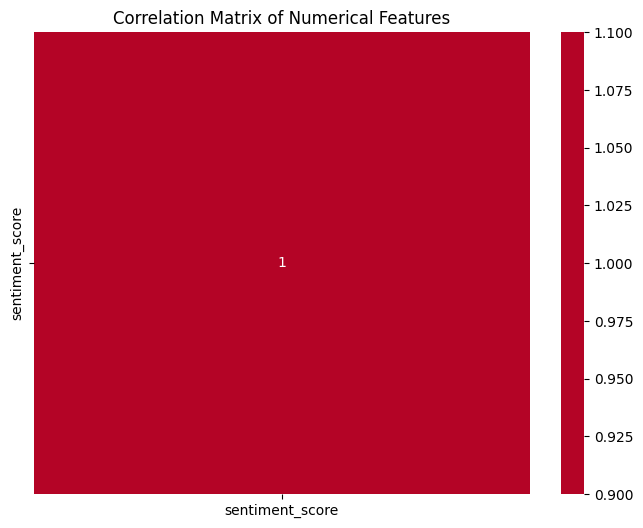

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Box plot of sentiment_score by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='sentiment_score', data=df, hue='season', legend=False, palette="Set3") # Fixed palette warning
plt.title('Distribution of Sentiment Score by Season')
plt.xlabel('Season')
plt.ylabel('Sentiment Score')
plt.show()

# 2. Violin plot of sentiment_score by subreddit
plt.figure(figsize=(12, 6))
sns.violinplot(x='subreddit', y='sentiment_score', data=df, hue='subreddit', legend=False, palette="husl") # Fixed palette warning
plt.title('Distribution of Sentiment Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Bar plot of average sentiment_score by season and label
season_label_stats = df.groupby(['season', 'label'])['sentiment_score'].agg(['mean', 'std'])
season_label_stats = season_label_stats.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='mean', hue='label', data=season_label_stats, palette="Paired", errorbar=('sd')) # Fixed ci warning
plt.title('Average Sentiment Score by Season and Label')
plt.xlabel('Season')
plt.ylabel('Average Sentiment Score')
plt.show()

# 4. Heatmap of correlations
# Exclude 'created_utc' from correlation calculation because it's a timestamp
numerical_cols = ['sentiment_score']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Interactive scatter plot
df['created_utc'] = pd.to_datetime(df['created_utc'])

fig = px.scatter(df, x='sentiment_score', y='created_utc', color='season', size=abs(df['sentiment_score']),
                 hover_data=['subreddit', 'label'],
                 title='Sentiment Score over Time',
                 labels={'sentiment_score': 'Sentiment Score', 'created_utc': 'Created UTC'})
fig.show()

## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* The dataset contains 200 rows and 8 columns with no missing values.
* The average sentiment score is 0.076, with a standard deviation of 0.555.
* Sentiment score distributions vary across seasons, subreddits, and sentiment labels.  For example, 'Spring' has the highest count (58) in the 'season' column, while 'r/BipolarReddit' and 'r/mentalhealth' have the highest counts (44 each) in the 'subreddit' column.  The 'positive' label is the most frequent (101 counts) in the 'label' column.
* Detailed descriptive statistics (mean, median, standard deviation, and quantiles) of sentiment scores were calculated for each season, subreddit, and sentiment label combination.
* A pivot table summarizes the mean and median sentiment scores across seasons, subreddits, and labels, revealing potential interactions between these variables.

### Insights or Next Steps
* Investigate the significant variations in sentiment scores across different seasons and subreddits to understand the underlying reasons.
* Explore potential correlations between sentiment scores and other relevant factors not included in the initial analysis.
